# Predictive Analytics - Penyakit Diabetes ( Kesehatan )

- Nama  : Labiba Adinda Zahwana
- Email : labibaadinda11@gmail.com

1. Deskripsi Project
- Project ini bertujuan untuk membangun model prediksi diagnosis diabetes menggunakan data medis pasien. Model yang dikembangkan berfungsi untuk memprediksi apakah seorang pasien berpotensi mengidap diabetes atau tidak, berdasarkan serangkaian parameter medis dan demografis yang sudah tercatat.
2. Penjelasan Dataset
Dataset ini berasal dari **National Institute of Diabetes and Digestive and Kidney Diseases** dan fokus pada pasien wanita dengan usia minimal 21 tahun dari etnis Pima Indian. Pemilihan subset data ini dilakukan dengan beberapa batasan khusus untuk menjaga konsistensi dan relevansi data.

2.  Variabel dalam Dataset

* Dataset ini tersedia di publik dataset kaggle [Predict Diabetes Dataset - Kaggle](https://www.kaggle.com/datasets/whenamancodes/predict-diabities/data)
* Dataset berbentuk file `.csv` yang berisi beberapa fitur (variabel) medis dan satu variabel target (Outcome).

* **Variabel Independen (Predictor Variables):**
  Variabel ini adalah parameter medis yang digunakan untuk memprediksi kemungkinan diabetes, antara lain:

  * **Pregnancies**: Jumlah kehamilan
  * **Glucose**: Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral
  * **BloodPressure**: Tekanan darah diastolik (mm Hg)
  * **SkinThickness**: Ketebalan lipatan kulit trisep (mm)
  * **Insulin**: Tingkat insulin serum 2 jam (mu U/ml)
  * **BMI**: Indeks massa tubuh (berat dalam kg dibagi kuadrat tinggi dalam meter)
  * **DiabetesPedigreeFunction**: Fungsi pedigree diabetes, sebuah indikator riwayat keluarga diabetes
  * **Age**: Usia pasien (tahun)

* **Variabel Dependen (Target Variable):**

  * **Outcome**: Kategori hasil diagnosis diabetes (0 = tidak diabetes, 1 = diabetes)

## 1. Import Library
Import pustaka yang dibutuhkan untuk load data, EDA, pembangunan model, dan evaluasi nya

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV

## 2. Data Loading

In [10]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Exploratory Data Analysis

### 3. 1. Explore dataset
Tahap ini memiliki tujuan untuk mengeksplorasi struktur dan kualitas data yang ada. Proses ini fokus pada beberapa hal utama, yaitu:

* Memeriksa apakah terdapat nilai yang hilang (missing values).

* Mengecek data yang terduplikasi.

* Mengidentifikasi nilai-nilai yang abnormal atau outlier.

* Menilai apakah data sudah layak untuk dianalisis lebih lanjut atau membutuhkan penyesuaian terlebih dahulu.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**Hasil Analisis** :

- Hasil dari explorasi dataset menunjukkan bahwa tidak ada missing value dan tidak ada juga data yang duplicated
- Data set terdiri dari 9 variabel dengan 1 variabel target yaitu outcome.
- Dataset terdiri atas 768 baris data yang bertipe integer dan float.
- Selain itu, dengan memanfaatkan fungsi describe(), kita memperoleh ringkasan statistik dari dataset, seperti nilai rata-rata (mean), standar deviasi, nilai minimum, maksimum, serta informasi statistik lainnya.

### 3. 2. Explore distribusi data

<ipython-input-15-b21c112c2259>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=colors)


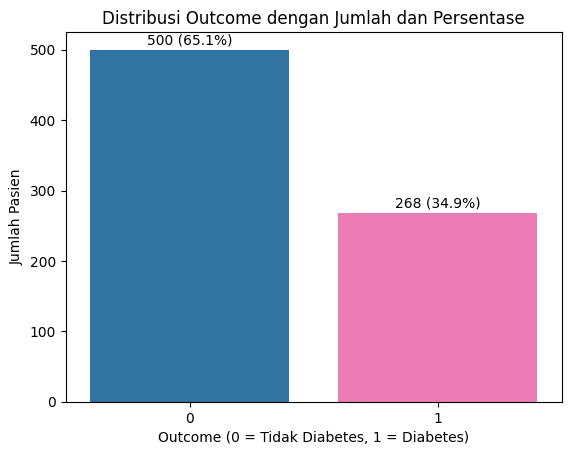

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = df['Outcome'].value_counts()
total = len(df)
percentages = counts / total * 100

colors = ['#1f77b4', '#ff69b4']

sns.barplot(x=counts.index, y=counts.values, palette=colors)
plt.title('Distribusi Outcome dengan Jumlah dan Persentase')
plt.xlabel('Outcome (0 = Tidak Diabetes, 1 = Diabetes)')
plt.ylabel('Jumlah Pasien')

for i, count in enumerate(counts):
    pct = percentages[i]
    plt.text(i, count + total*0.01, f'{count} ({pct:.1f}%)', ha='center')

plt.show()

A. Analisis Distribusi Outcome Dataset Diabetes

* **65,1%** pasien **tidak mengidap diabetes** (Outcome = 0)
* **34,1%** pasien **mengidap diabetes** (Outcome = 1)


B. Implikasi Analisis

1. Distribusi data cukup seimbang meskipun tidak 50:50, proporsi positif diabetes (sekitar sepertiga) sudah cukup representatif untuk pelatihan model klasifikasi. Ini memudahkan model belajar pola kedua kelas dengan baik.

2. Tidak terlalu imbalance, sehingga metode pelatihan standar bisa berjalan tanpa harus menggunakan teknik penanganan imbalance (seperti oversampling atau penalti khusus). Namun, tetap perlu dicek performa model agar tidak bias.

3. Penting untuk evaluasi dengan metrik yang tepat, seperti AUC-ROC, F1-score, selain akurasi, untuk memastikan model mampu memprediksi kedua kelas secara seimbang.

4. Distribusi ini juga menggambarkan kondisi populasi pasien wanita Pima Indian dalam dataset, di mana hampir sepertiga berpotensi mengidap diabetes, informasi penting bagi analisis epidemiologi dan intervensi medis.



**Histogram untuk kolom numerik di Data Frame**

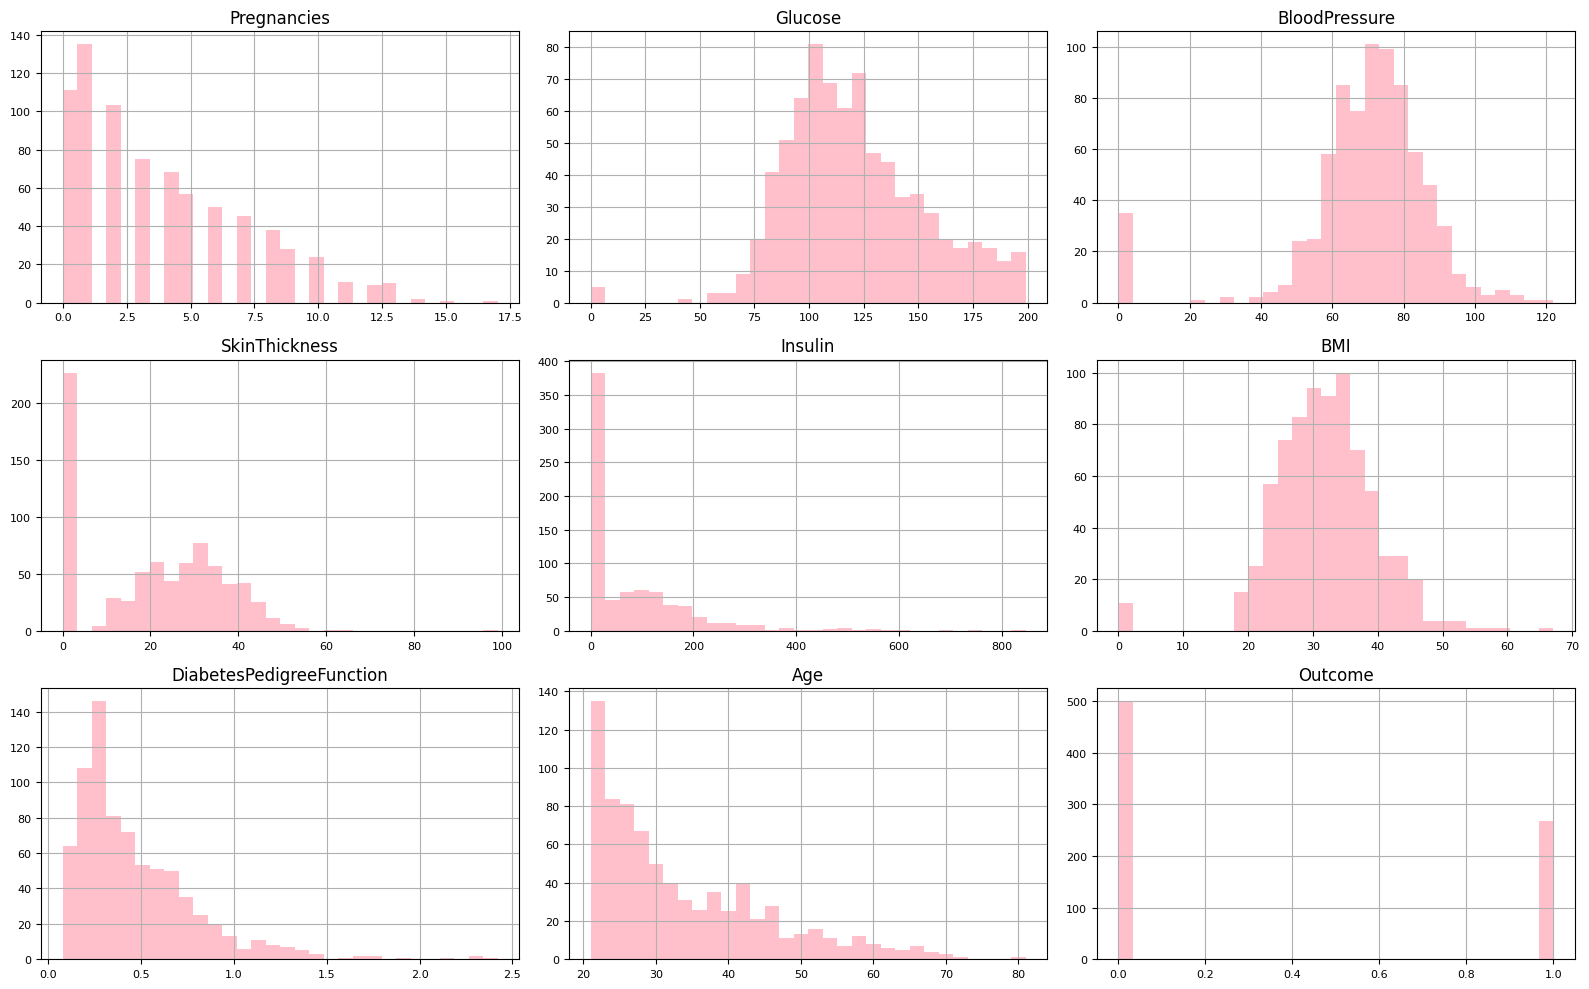

In [16]:
# Filter kolom numerik saja
col_numerik = df.select_dtypes(include=['float64', 'int64']).columns

# Buat figure dan axes dengan 3 baris dan 3 kolom
fig, axes = plt.subplots(3, 3, figsize=(16, 10))

# Flatten axes supaya bisa di-loop dengan mudah
axes = axes.flatten()

# Plot histogram tiap kolom numerik dengan warna pink
for i, col in enumerate(col_numerik):
    df[col].hist(ax=axes[i], bins=30, color='pink')  # warna pink
    axes[i].set_title(col)
    axes[i].tick_params(axis='both', labelsize=8)

# Hapus axes kosong jika kolom numerik kurang dari 9
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Analisis grafik hist plot :

1. Pregnancies

* Distribusi menunjukkan sebagian besar pasien memiliki jumlah kehamilan rendah, terutama antara 0 sampai 5 kali.
* Ada penurunan frekuensi signifikan pada jumlah kehamilan lebih dari 5, dan sangat sedikit pasien dengan kehamilan lebih dari 10.


2. Glucose

* Data glukosa plasma tersebar normal dengan puncak di sekitar 100-120 mg/dL.
* Ada nilai ekstrem di bagian kanan (nilai glukosa sangat tinggi) yang bisa jadi indikator risiko diabetes.
* Sebagian kecil pasien memiliki kadar glukosa rendah.

3. BloodPressure

* Tekanan darah sebagian besar berkisar di 60-90 mm Hg, dengan puncak sekitar 60-70.
* Distribusi cenderung normal tapi ada outlier di nilai tinggi (>100).

4. SkinThickness

* Mayoritas data berada di rentang 0-40 mm.
* Terdapat banyak nilai 0 yang juga kemungkinan data hilang atau tidak tercatat.
* Distribusi agak miring ke kanan dengan beberapa nilai ekstrim tinggi.

5. Insulin

* Sebagian besar data berkonsentrasi di nilai rendah, dengan puncak di dekat 0, ada banyak nol yang perlu diperiksa.
* Sebagian kecil nilai sangat tinggi (lebih dari 400), menunjukkan distribusi yang sangat miring ke kanan (skewed).

6. BMI

* Distribusi BMI berkisar antara 20 sampai 40 dengan puncak sekitar 30-35, yang termasuk kategori overweight hingga obesitas.
* Ada beberapa nilai nol yang tidak wajar, perlu diperiksa.
* Ini menunjukkan sebagian besar pasien memiliki BMI di atas normal.

7. DiabetesPedigreeFunction

* Nilai fungsi pedigree berkisar rendah, sebagian besar di bawah 1.0, dengan beberapa nilai sampai 2.5.
* Distribusi miring ke kanan, artinya sebagian kecil pasien punya riwayat keluarga diabetes yang tinggi.

8. Age

* Sebagian besar pasien berusia 20-40 tahun, dengan penurunan jumlah pasien di usia lebih tua.
* Ada rentang usia sampai 80 tahun.
* Distribusi ini cukup representatif populasi dewasa muda dan paruh baya.

9. Outcome

* Distribusi target cukup seimbang dengan lebih banyak pasien negatif diabetes (0) dibanding positif (1).
* Jumlah pasien dengan Outcome=0 sekitar dua kali lipat dari Outcome=1, konsisten dengan analisis distribusi sebelumnya.


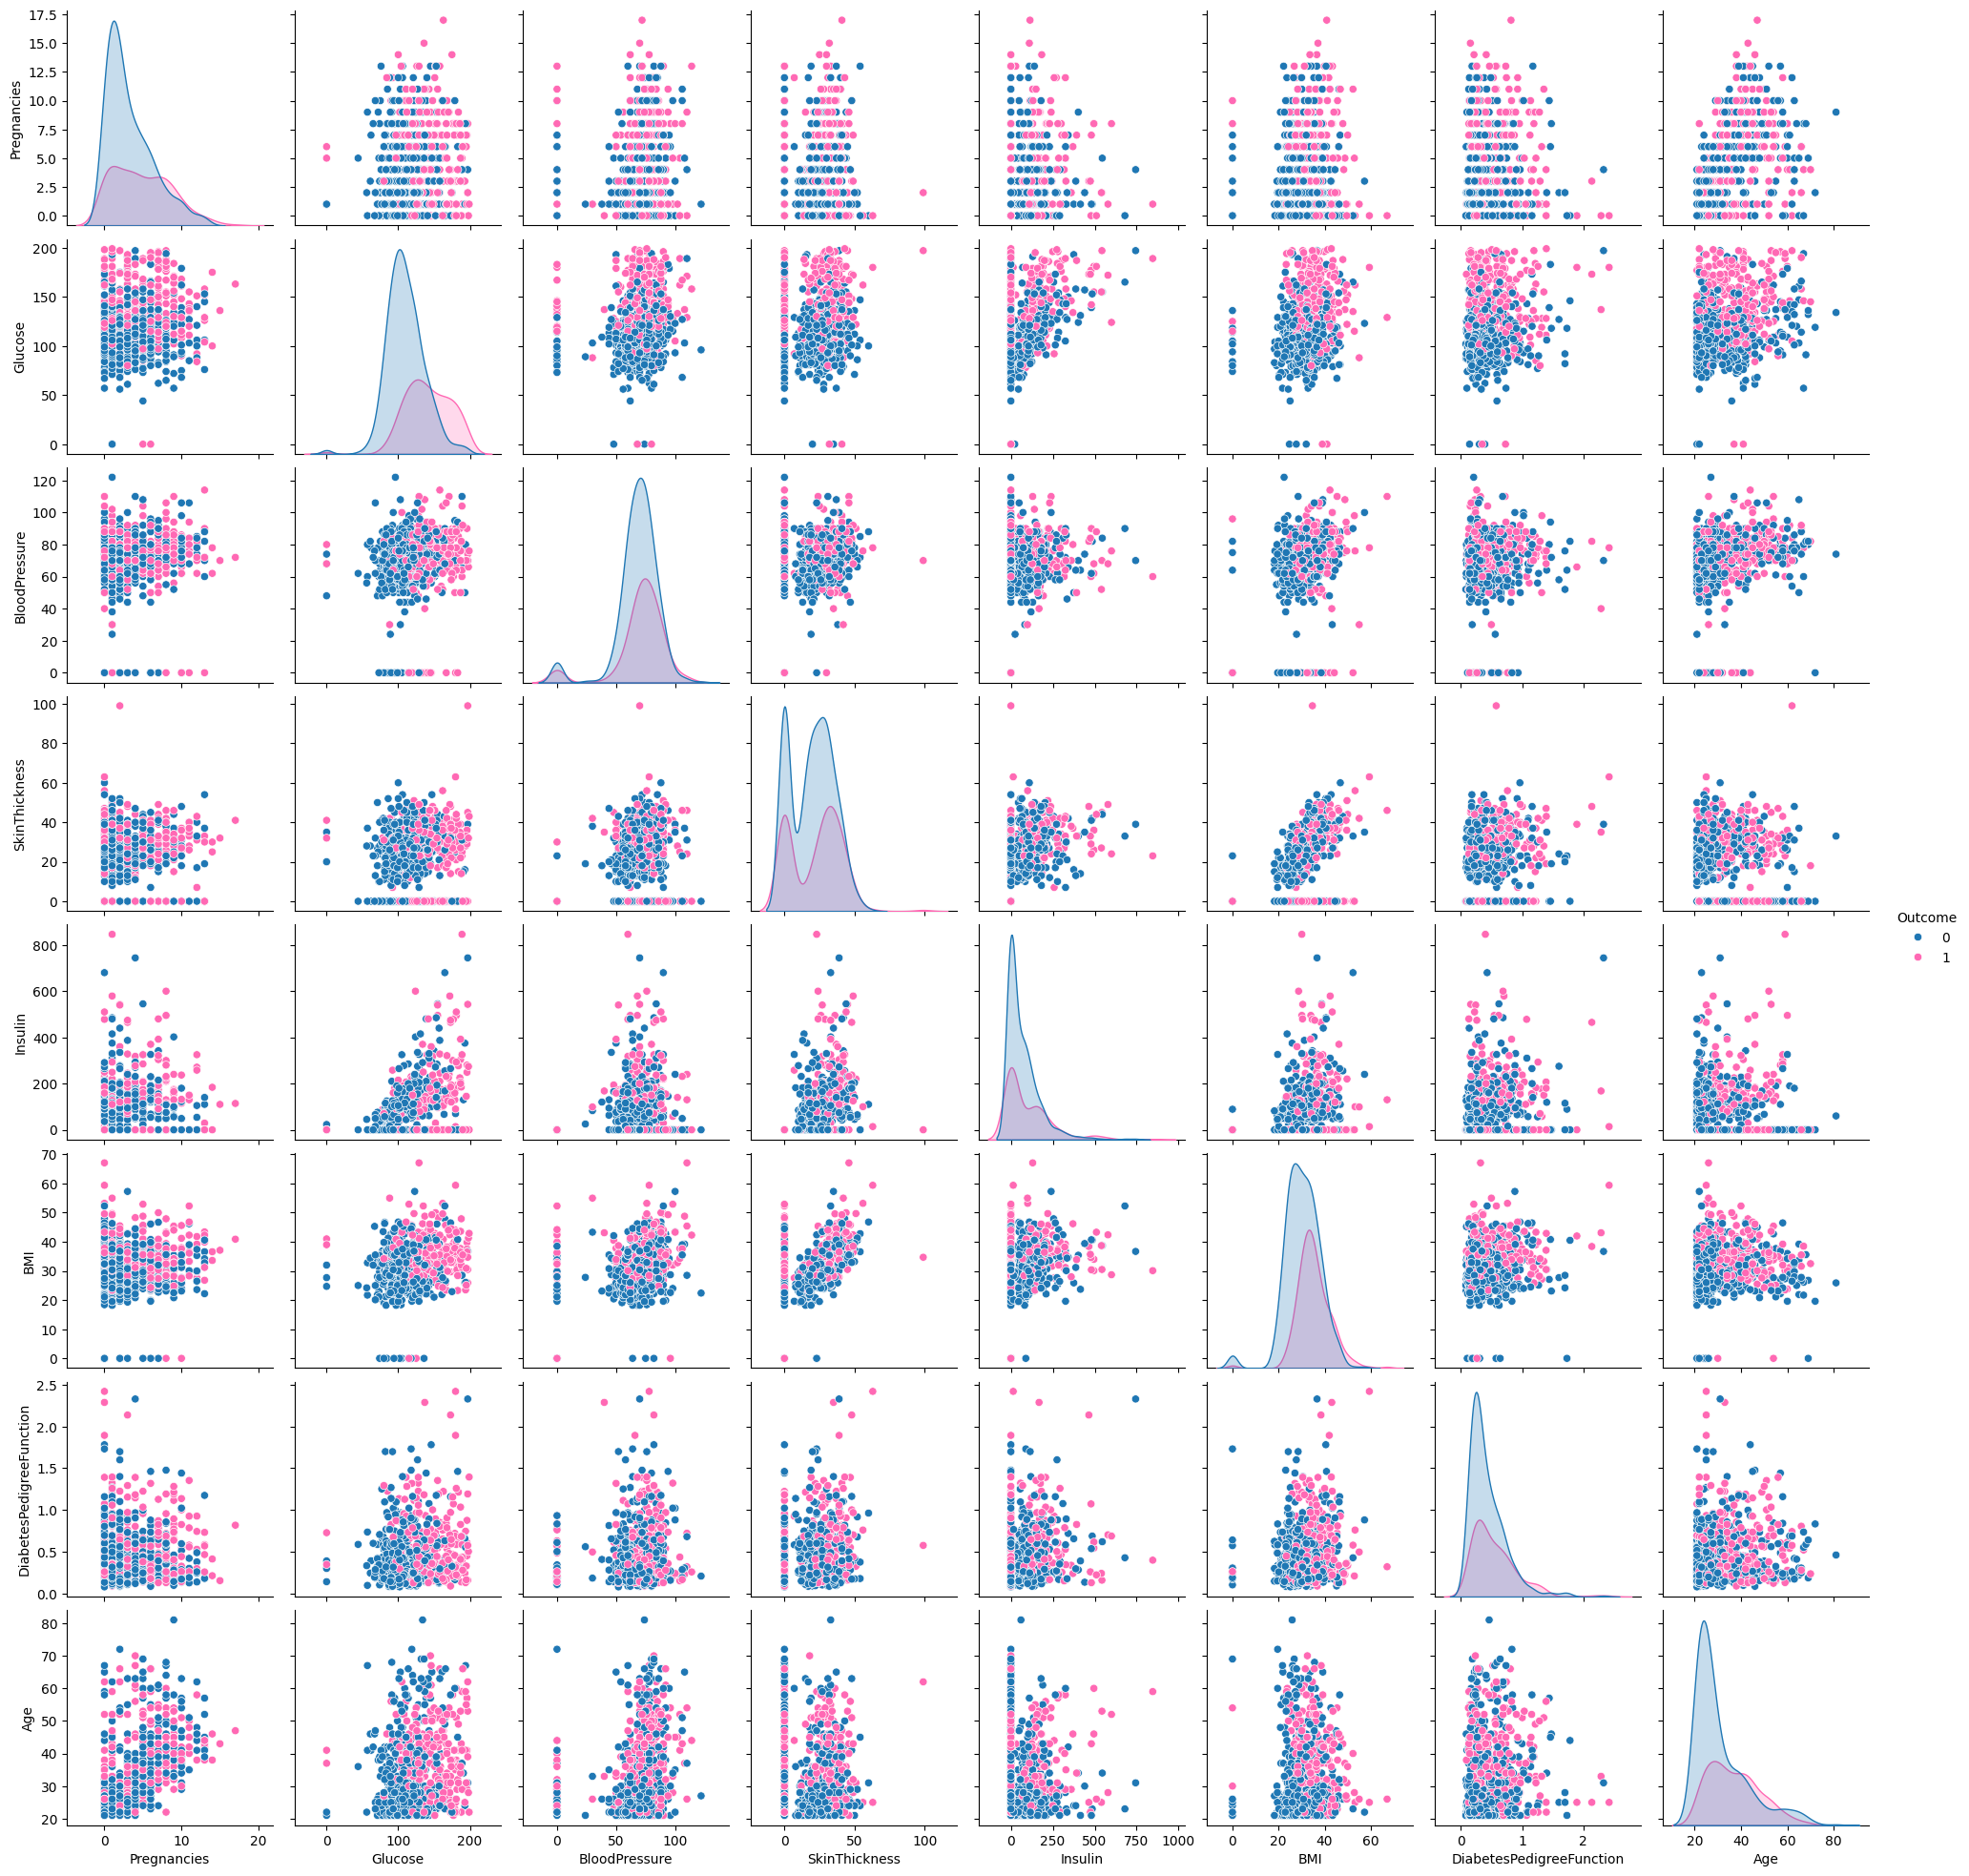

In [17]:
# Definisikan palette warna untuk Outcome 0 dan 1
# 1 pink, 0 biru
palette_colors = {0: '#1f77b4', 1: '#ff69b4'}  # pink dan biru

sns.pairplot(df, hue="Outcome", palette=palette_colors)
plt.show()

**Korelasi data dengan heatmap**

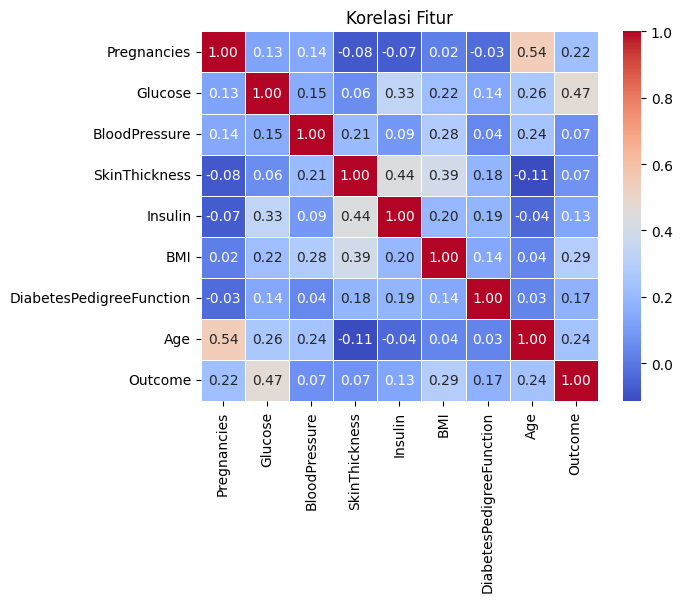

In [18]:
cm = df.corr()
sns.heatmap(cm, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Korelasi Fitur')
plt.show()

**Analisis Korelasi Fitur Dataset Diabetes**
1. Korelasi dengan Outcome (Target)

* **Glucose (0.47)**
  Memiliki korelasi positif sedang yang paling tinggi dengan Outcome. Artinya, semakin tinggi kadar glukosa, semakin besar kemungkinan pasien mengidap diabetes.

* **BMI (0.29)**
  Korelasi positif sedang, menandakan BMI yang lebih tinggi berhubungan dengan risiko diabetes lebih besar.

* **Age (0.24)**
  Usia juga berkorelasi positif, menunjukkan pasien yang lebih tua cenderung lebih berisiko diabetes.

* **Pregnancies (0.22)**
  Jumlah kehamilan menunjukkan korelasi positif lemah sampai sedang dengan diabetes.

* **DiabetesPedigreeFunction (0.17)**
  Korelasi positif rendah, menunjukkan riwayat keluarga diabetes sedikit berpengaruh.

* **Insulin (0.13), BloodPressure (0.07), SkinThickness (0.07)**
  Korelasi yang sangat lemah sampai hampir netral terhadap Outcome.


2. Korelasi Antar Fitur

* **Pregnancies & Age (0.54)**
  Korelasi positif sedang sampai kuat, artinya wanita yang lebih tua biasanya pernah mengalami lebih banyak kehamilan.

* **Insulin & SkinThickness (0.44)**
  Korelasi positif sedang, keduanya terkait karena ketebalan kulit dan kadar insulin berkaitan dengan fungsi metabolisme dan resistensi insulin.

* **BMI & SkinThickness (0.39)**
  Korelasi positif sedang, keduanya berhubungan dengan lemak tubuh.

* **Glucose & Insulin (0.33)**
  Korelasi positif sedang, logis karena kadar insulin dan glukosa saling berhubungan dalam metabolisme gula darah.

* Korelasi antar fitur lain sebagian besar rendah hingga sedang, menunjukkan fitur relatif independen satu sama lain.


**Insight**

* Fitur **Glucose**, **BMI**, **Age**, dan **Pregnancies** adalah predictor paling signifikan untuk diabetes pada dataset ini.
* Beberapa fitur seperti **Insulin**, **SkinThickness**, dan **BloodPressure** memiliki korelasi rendah terhadap target, tapi mungkin tetap berguna dalam model kompleks.
* Korelasi antar fitur tidak terlalu tinggi (tidak ada multikolinearitas kuat), sehingga fitur-fitur tersebut bisa digunakan bersamaan tanpa banyak redundansi.


**Detect Outlier dengan IQR**

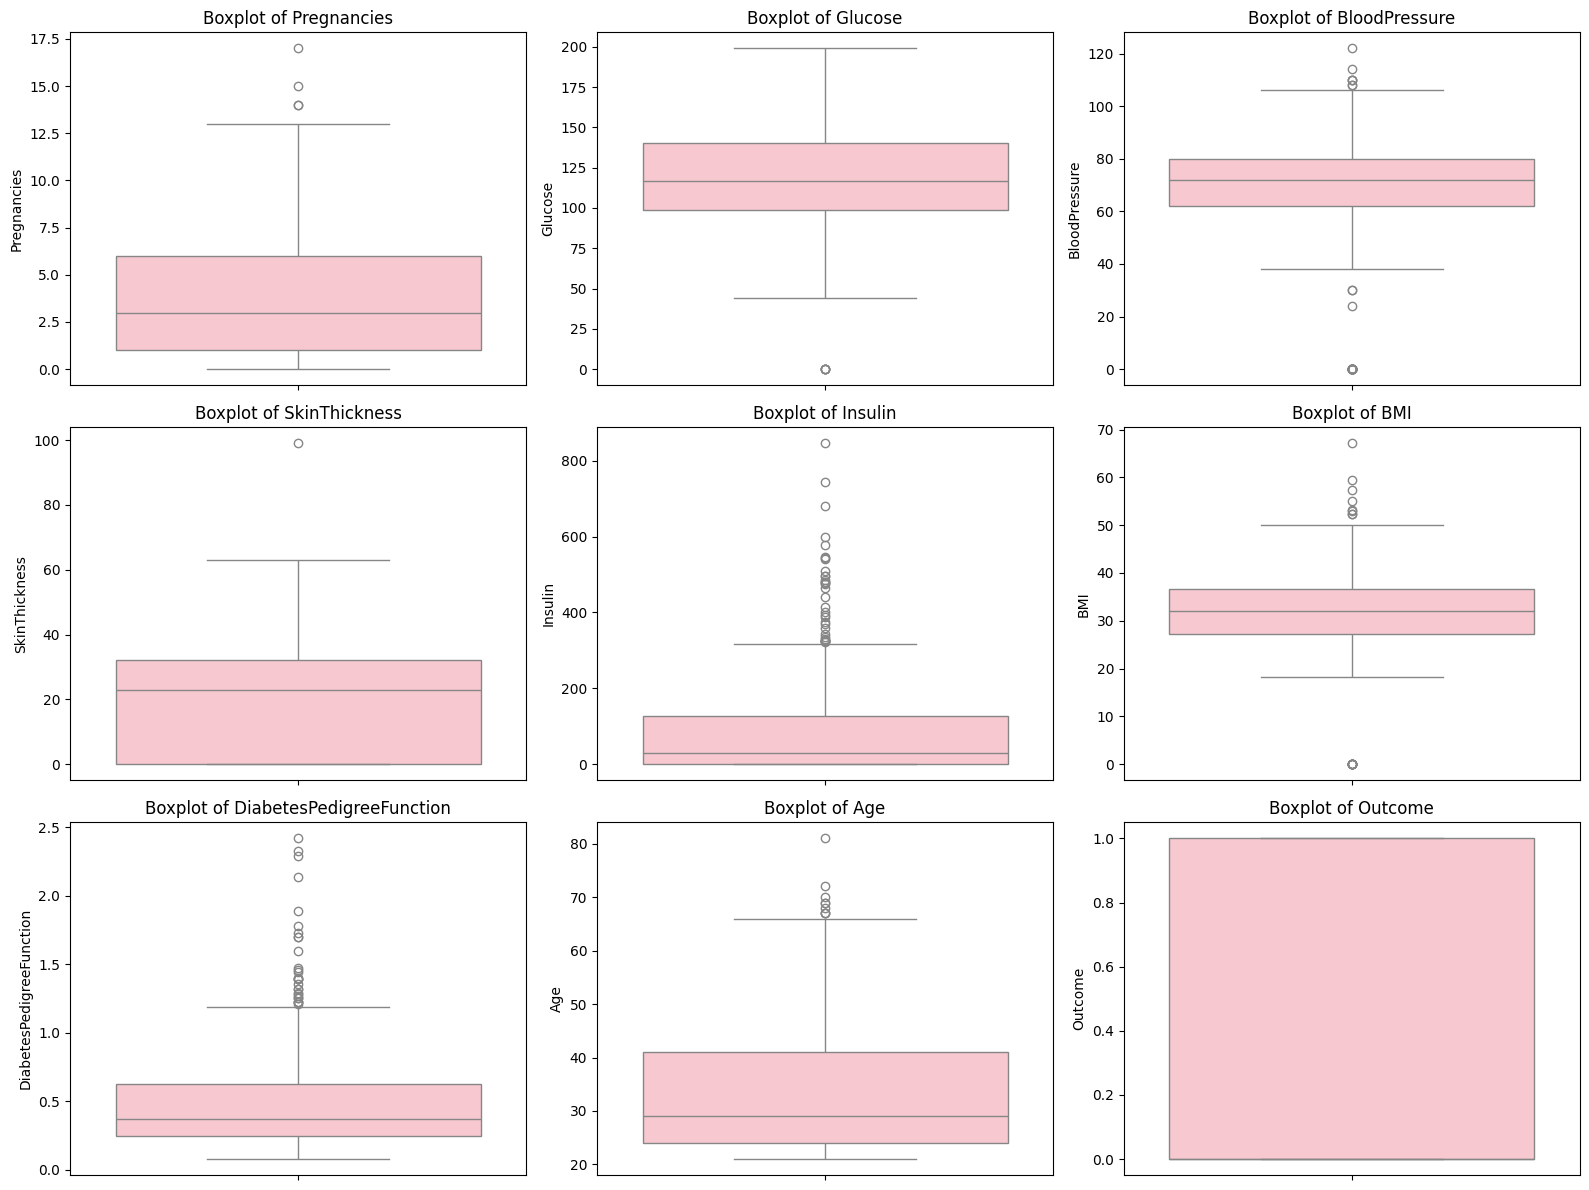

In [19]:
plt.figure(figsize=(16,12))

for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color='pink')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Analisis boxplot tiap fitur:

* **Pregnancies:** Sebagian besar di bawah 6, ada beberapa outlier tinggi.
* **Glucose:** Mayoritas normal, tapi ada nilai nol dan outlier tinggi.
* **BloodPressure:** Banyak nilai nol yang tidak valid, ada outlier tinggi.
* **SkinThickness:** Sebagian besar rendah, ada outlier ekstrem.
* **Insulin:** Banyak outlier sangat tinggi, distribusi sangat miring.
* **BMI:** Mayoritas di kisaran overweight, ada nilai nol dan outlier tinggi.
* **DiabetesPedigreeFunction:** Sebagian besar kecil, ada outlier tinggi.
* **Age:** Sebagian besar 20-40 tahun, ada outlier usia lanjut.
* **Outcome:** Variabel biner, tidak ada outlier.



## 4. Data Wrangling

### 4. 1. Data Preprocessing

**Outlier Handling**

In [20]:
def handle_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Clip nilai ke batas bawah dan atas (winsorizing)
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Pilih kolom numerik untuk ditangani outliernya (kecuali Outcome)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Outcome')

df = handle_outliers_iqr(df, numerical_cols)

print("Penanganan outlier selesai.")

Penanganan outlier selesai.


**Plot setelah Outlier Handling**

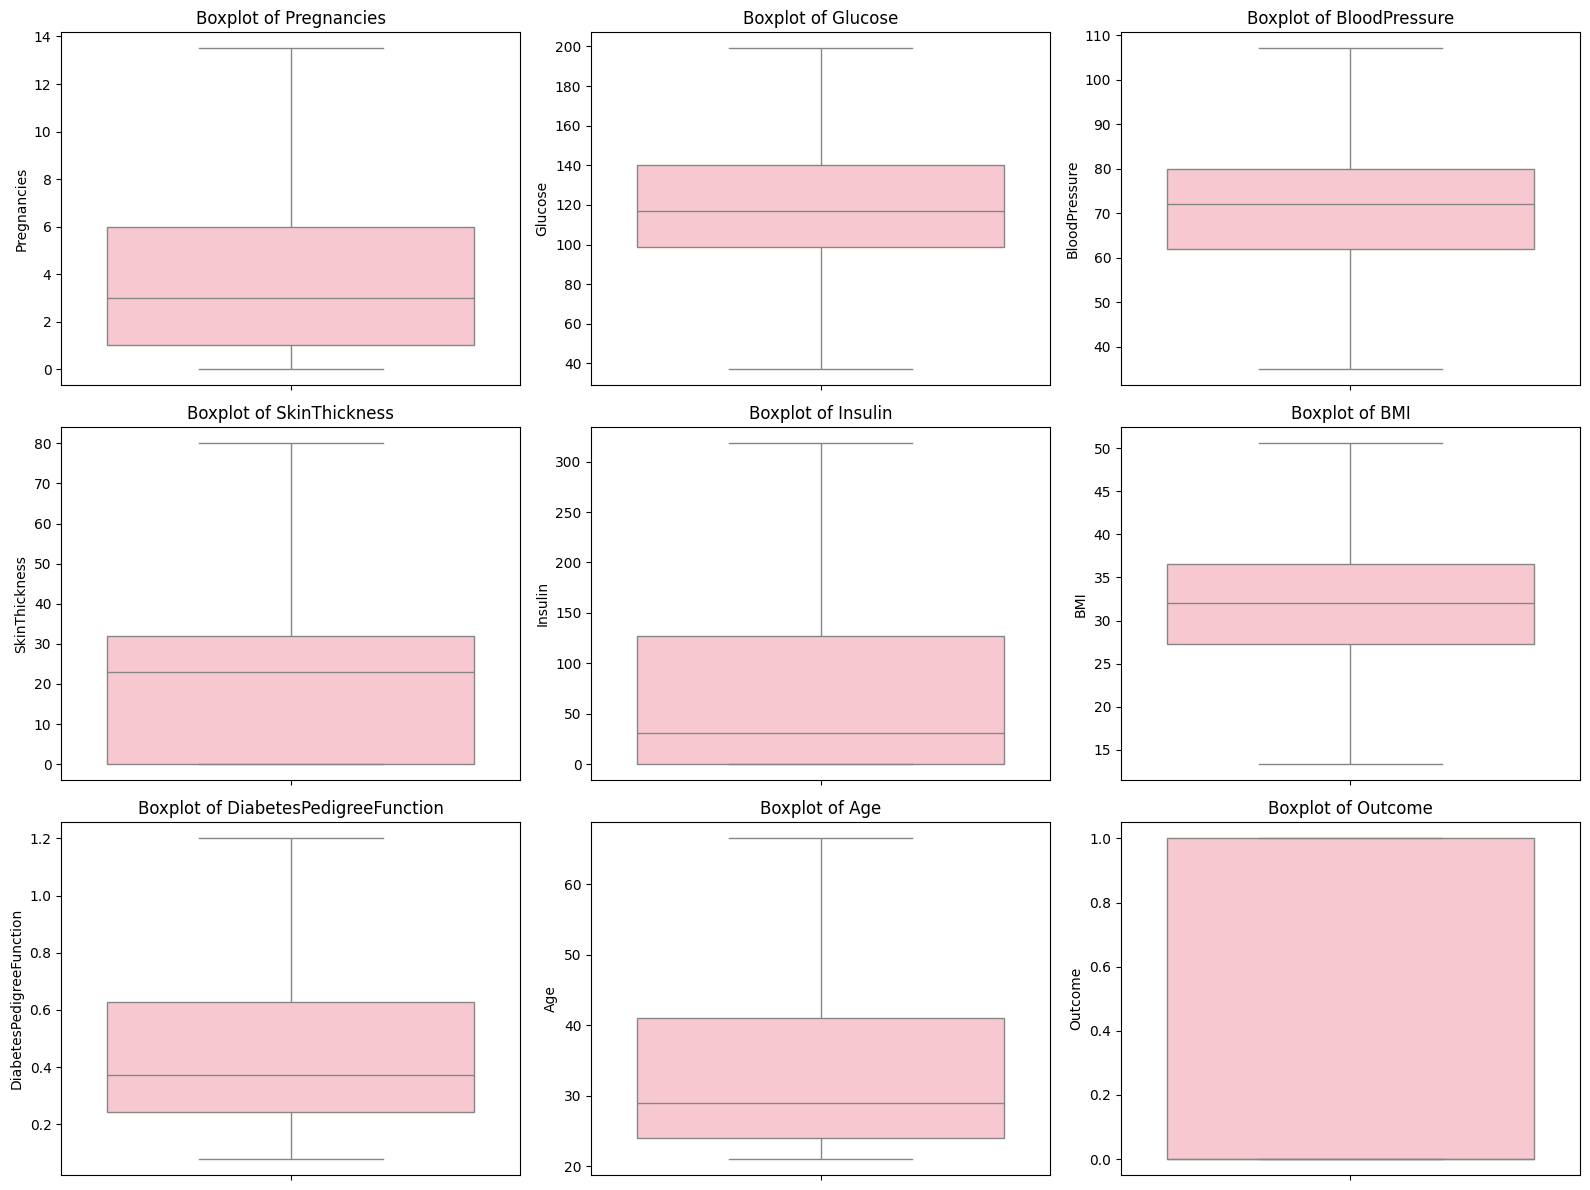

In [21]:
plt.figure(figsize=(16,12))

for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color='pink')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Berhasil handling outlier terlihat sudah tidak ada outlier lagi

**Imbalance Data Handling dengan metode SMOTE**

In [22]:
# drop fitur yang y nya
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# apply smote method
def apply_smote(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

X_resampled, y_resampled = apply_smote(X, y)

class_distribution = y_resampled.value_counts()
print("Distribusi kelas setelah oversampling:")
print(class_distribution)

Distribusi kelas setelah oversampling:
Outcome
1    500
0    500
Name: count, dtype: int64


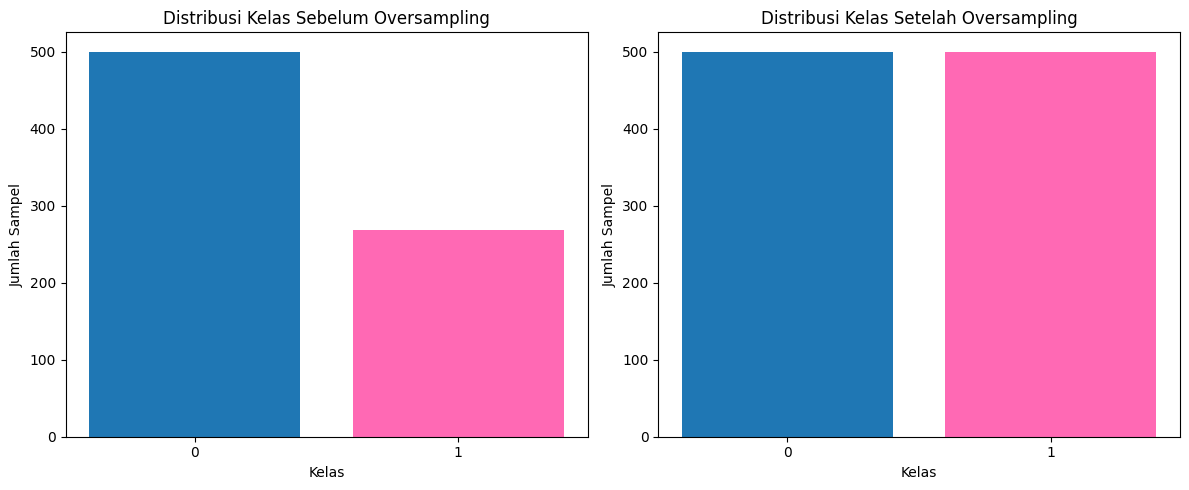

In [23]:
# Hitung distribusi kelas sebelum oversampling
counter_before = Counter(y)

# Oversampling dengan SMOTE
oversample = SMOTE(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Hitung distribusi kelas setelah oversampling
counter_after = Counter(y_resampled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Warna: kelas 0 pink, kelas 1 biru (ditukar dari sebelumnya)
colors = ['#ff69b4', '#1f77b4']

# Plot sebelum oversampling
bars_before = axes[0].bar(counter_before.keys(), counter_before.values(), color=colors)
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah Sampel')
axes[0].set_title('Distribusi Kelas Sebelum Oversampling')
axes[0].set_xticks(list(counter_before.keys()))



# Plot setelah oversampling
bars_after = axes[1].bar(counter_after.keys(), counter_after.values(), color=colors)
axes[1].set_xlabel('Kelas')
axes[1].set_ylabel('Jumlah Sampel')
axes[1].set_title('Distribusi Kelas Setelah Oversampling')
axes[1].set_xticks(list(counter_after.keys()))

plt.tight_layout()
plt.show()


Data yang tidak seimbang (imbalanced data) telah berhasil ditangani, data sekarang sudah seimbang dan siap digunakan untuk tahap pengembangan model.

### 4. 2. **Data Splitting**

Setelah melakukan beberapa percobaan (sebelumnya menggunakan pembagian 80:20), pada kasus ini dataset akan dibagi dengan rasio 70:30, yakni 70% untuk data pelatihan dan 30% untuk data pengujian.

In [24]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data Latih (Train):", X_train.shape)
print("Data Uji (Test):", X_test.shape)

Data Latih (Train): (537, 8)
Data Uji (Test): (231, 8)


### 4. 3. Standardisasi

Sebelum membangun model machine learning, dilakukan proses standardisasi terlebih dahulu. Tahap ini bertujuan untuk mengubah fitur numerik dalam data sehingga memiliki nilai rata-rata nol dan standar deviasi satu.

In [25]:
num_pipeline = Pipeline([('std_scaler', StandardScaler())])
X_train_prepared = num_pipeline.fit_transform(X_train)
X_test_prepared = num_pipeline.transform(X_test)

## 5. Modeling dan Evaluate

Train Accuracy Score: 88.45%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       349
           1       0.90      0.76      0.82       188

    accuracy                           0.88       537
   macro avg       0.89      0.85      0.87       537
weighted avg       0.89      0.88      0.88       537



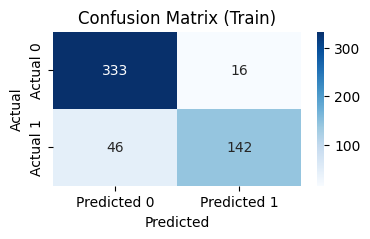

Test Accuracy Score: 74.46%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



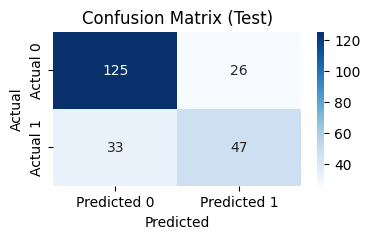

In [26]:
def evaluate(clf, X_train, y_train, X_test, y_test, train=False):

    classes = y_train.unique() if train else y_test.unique()

    data_type = "Train" if train else "Test"

    pred_func = clf.predict(X_train) if train else clf.predict(X_test)

    clf_report = classification_report(y_train, pred_func) if train else classification_report(y_test, pred_func)
    accuracy = accuracy_score(y_train, pred_func) * 100 if train else accuracy_score(y_test, pred_func) * 100

    cm = confusion_matrix(y_train, pred_func) if train else confusion_matrix(y_test, pred_func)

    plt.figure(figsize=(4, 2))
    sns.heatmap(
        cm,
        annot=True,
        cmap='Blues',
        fmt='g',
        xticklabels=[f'Predicted {class_name}' for class_name in classes],
        yticklabels=[f'Actual {class_name}' for class_name in classes]
    )

    print(f"{data_type} Accuracy Score: {accuracy:.2f}%")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({data_type})')
    plt.show()

random_forest_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    max_features='sqrt',
    random_state=42
)

random_forest_model.fit(X_train, y_train)

evaluate(random_forest_model, X_train, y_train, X_test, y_test, train=True)

evaluate(random_forest_model, X_train, y_train, X_test, y_test, train=False)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:31:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Train Accuracy Score: 100.00%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       188

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



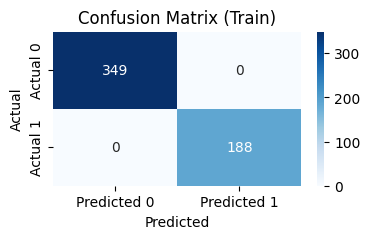

Test Accuracy Score: 71.86%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       151
           1       0.59      0.64      0.61        80

    accuracy                           0.72       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.73      0.72      0.72       231



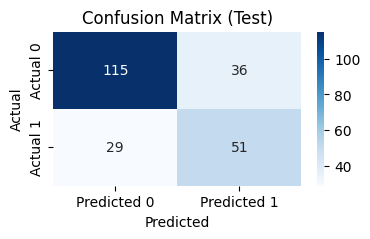

In [27]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

evaluate(xgb_model, X_train, y_train, X_test, y_test, train=True)
evaluate(xgb_model, X_train, y_train, X_test, y_test, train=False)


Train Accuracy Score: 78.21%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       349
           1       0.74      0.59      0.65       188

    accuracy                           0.78       537
   macro avg       0.77      0.74      0.75       537
weighted avg       0.78      0.78      0.78       537



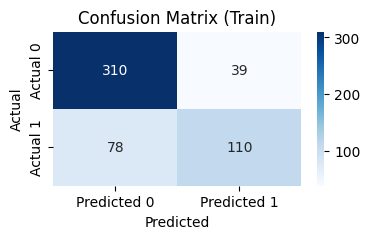

Test Accuracy Score: 74.46%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



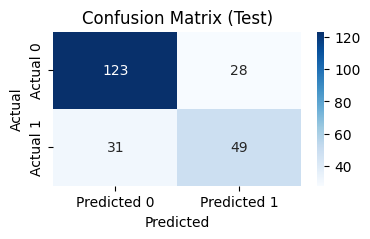

In [28]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

evaluate(logreg_model, X_train, y_train, X_test, y_test, train=True)
evaluate(logreg_model, X_train, y_train, X_test, y_test, train=False)

Train Accuracy Score: 80.45%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.83      0.89      0.85       349
           1       0.75      0.65      0.70       188

    accuracy                           0.80       537
   macro avg       0.79      0.77      0.78       537
weighted avg       0.80      0.80      0.80       537



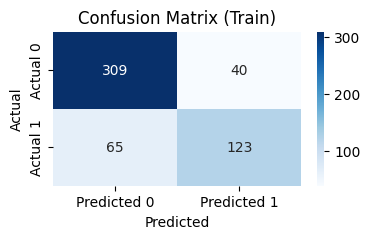

Test Accuracy Score: 68.83%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



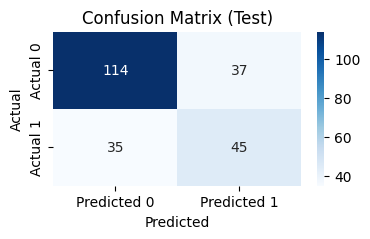

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

evaluate(knn_model, X_train, y_train, X_test, y_test, train=True)
evaluate(knn_model, X_train, y_train, X_test, y_test, train=False)


Train Accuracy Score: 78.03%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       349
           1       0.81      0.48      0.61       188

    accuracy                           0.78       537
   macro avg       0.79      0.71      0.73       537
weighted avg       0.79      0.78      0.76       537



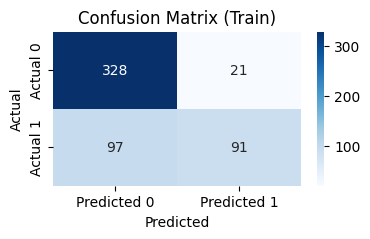

Test Accuracy Score: 74.89%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       151
           1       0.68      0.53      0.59        80

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



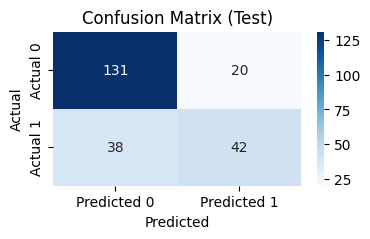

In [30]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

evaluate(svm_model, X_train, y_train, X_test, y_test, train=True)
evaluate(svm_model, X_train, y_train, X_test, y_test, train=False)

## 6. Kesimpulan

In [31]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

models = {
    "Random Forest": random_forest_model,
    "XGBoost": xgb_model,
    "Logistic Regression": logreg_model,
    "KNN": knn_model,
    "SVM": svm_model
}

best_model_name = None
best_auc = 0
best_model = None

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = None

    # Untuk ROC AUC kita butuh probabilitas prediksi
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        print(f"{name} tidak mendukung prediksi probabilitas, AUC tidak dihitung.")

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print(f"\nModel: {name}")
    print(f"Accuracy : {acc:.4f}")
    print(f"F1-Score : {f1:.4f}")
    if auc is not None:
        print(f"AUC-ROC  : {auc:.4f}")
    else:
        print("AUC-ROC  : Tidak tersedia")

    # Pilih model terbaik berdasarkan AUC
    if auc is not None and auc > best_auc:
        best_auc = auc
        best_model_name = name
        best_model = model

print(f"\nBest model berdasarkan AUC: {best_model_name} dengan skor {best_auc:.4f}")



Model: Random Forest
Accuracy : 0.7446
F1-Score : 0.6144
AUC-ROC  : 0.8035

Model: XGBoost
Accuracy : 0.7186
F1-Score : 0.6108
AUC-ROC  : 0.7815

Model: Logistic Regression
Accuracy : 0.7446
F1-Score : 0.6242
AUC-ROC  : 0.8006

Model: KNN
Accuracy : 0.6883
F1-Score : 0.5556
AUC-ROC  : 0.7268


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:31:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: SVM
Accuracy : 0.7489
F1-Score : 0.5915
AUC-ROC  : 0.7776

Best model berdasarkan AUC: Random Forest dengan skor 0.8035




**Analisis Performa Model**

| Model                   | Accuracy             | F1-Score             | AUC-ROC              |
| ----------------------- | -------------------- | -------------------- | -------------------- |
| **Random Forest**       | 74.46%               | 0.6144               | **0.8035** (terbaik) |
| **XGBoost**             | 71.86%               | 0.6108               | 0.7815               |
| **Logistic Regression** | 74.46%               | **0.6242** (terbaik) | 0.8006               |
| **KNN**                 | 68.83%               | 0.5556               | 0.7268               |
| **SVM**                 | **74.89%** (terbaik) | 0.5915               | 0.7776               |

---

**Insight:**

* **Random Forest** unggul pada nilai AUC-ROC (0.8035), artinya model ini paling baik dalam membedakan kelas positif dan negatif secara keseluruhan.
* **Logistic Regression** memiliki F1-score terbaik (0.6242), menunjukkan keseimbangan precision dan recall terbaik untuk kelas positif, sangat penting jika fokus pada deteksi kasus diabetes.
* **SVM** memiliki akurasi test tertinggi (74.89%), tapi F1-score dan AUC sedikit lebih rendah dari Random Forest dan Logistic Regression, menandakan mungkin model ini kurang optimal dalam recall kelas minoritas.
* **XGBoost** dan **KNN** memiliki performa lebih rendah di semua metrik, terutama KNN yang cukup jauh di belakang.
* Secara umum, ketiga model top (Random Forest, Logistic Regression, SVM) memberikan performa yang cukup kompetitif dan bisa dipilih sesuai prioritas metrik (misal prioritaskan AUC atau F1-score).
